## Advertising: Logistic Regression Project

### Advertising data set includes details of an internet user with each features describing something about their behaviour on the internet.
### The main focus here is to use all the available information and somehow determine whether or not a particular user clicked on an Advertisement on the website.
### So the idea is to create a model that will predict whether or not a user clicks on an ad based on the features of that user.


### This data set contains the following features:

### * 'Daily Time Spent on Site': User's time on site in minutes
### * 'Age': User's age in years
### * 'Area Income': Avg. Income of geographical area of User
### * 'Daily Internet Usage': Avg. minutes a day User is on the internet
### * 'Ad Topic Line': Headline of the advertisement
### * 'City': City of User
### * 'Male': Whether or not the User's gender was male
### * 'Country': Country of the User
### * 'Timestamp': Time at which the User either clicked on the Ad or closed the window
### * 'Clicked on Ad': 0 or 1 where 1 indicates clicking on Ad and 0 indicates closing the window 

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

**Reading the dataset**

In [6]:
ad_data = pd.read_csv('advertising.csv')

In [7]:
ad_data.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [8]:
ad_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  1000 non-null   float64
 1   Age                       1000 non-null   int64  
 2   Area Income               1000 non-null   float64
 3   Daily Internet Usage      1000 non-null   float64
 4   Ad Topic Line             1000 non-null   object 
 5   City                      1000 non-null   object 
 6   Male                      1000 non-null   int64  
 7   Country                   1000 non-null   object 
 8   Timestamp                 1000 non-null   object 
 9   Clicked on Ad             1000 non-null   int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 78.2+ KB


In [9]:
ad_data.describe()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000,1000.00000
mean,65.000200,36.009000,55000.000080,180.000100,0.481000,0.50000
std,15.853615,8.785562,13414.634022,43.902339,0.499889,0.50025
min,32.600000,19.000000,13996.500000,104.780000,0.000000,0.00000
25%,51.360000,29.000000,47031.802500,138.830000,0.000000,0.00000
50%,68.215000,35.000000,57012.300000,183.130000,0.000000,0.50000
75%,78.547500,42.000000,65470.635000,218.792500,1.000000,1.00000
max,91.430000,61.000000,79484.800000,269.960000,1.000000,1.00000


## Exploratory Data Analysis

Text(0.5, 0, 'Age')

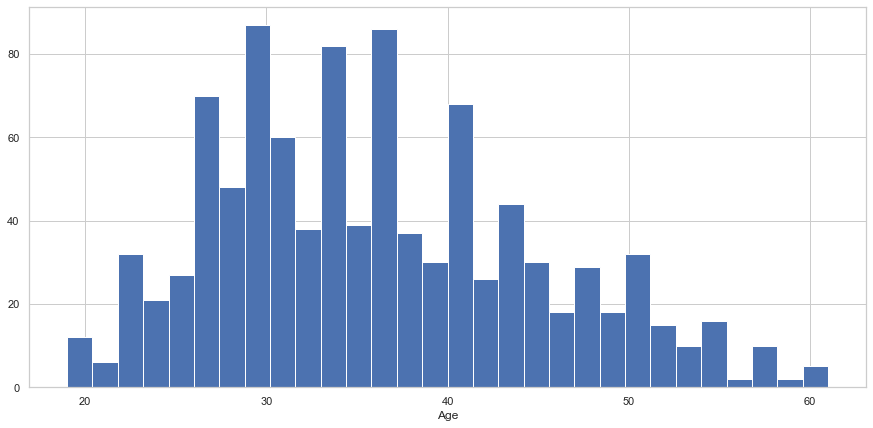

In [10]:
sns.set(rc={'figure.figsize':(15,7)})
sns.set_style('whitegrid')
ad_data['Age'].hist(bins=30)
plt.xlabel('Age')

A comparison between 'Age' and 'Area Income' distribution with help of Jointplot

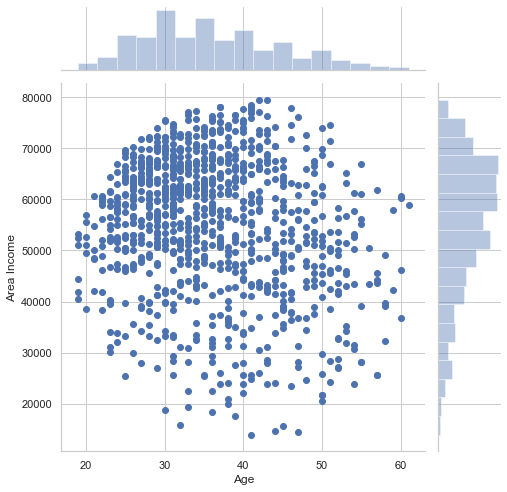

In [11]:
sns.jointplot(x='Age',y='Area Income',data=ad_data, height=7)

Jointplot showing the Kernel Density Estimate (KDE) of 'Daily Time spent on site' vs 'Age'

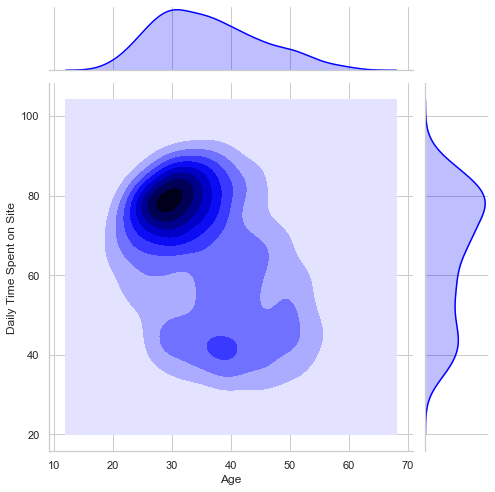

In [27]:
sns.jointplot(x='Age',y='Daily Time Spent on Site',data=ad_data,color='blue',kind='kde', height=7);

It can be seen that more over the early age group (20-40 years) spend more time over the site rather than older generation

Jointplot on 'Daily Time Spent on Site' vs 'Daily Internet Usage'

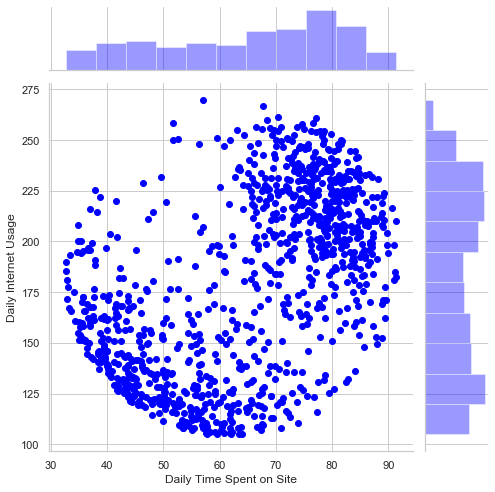

In [13]:
sns.jointplot(x='Daily Time Spent on Site',y='Daily Internet Usage',data=ad_data,color='blue', height=7)

Pairplot with the hue defined as 'Clicked on Ad'

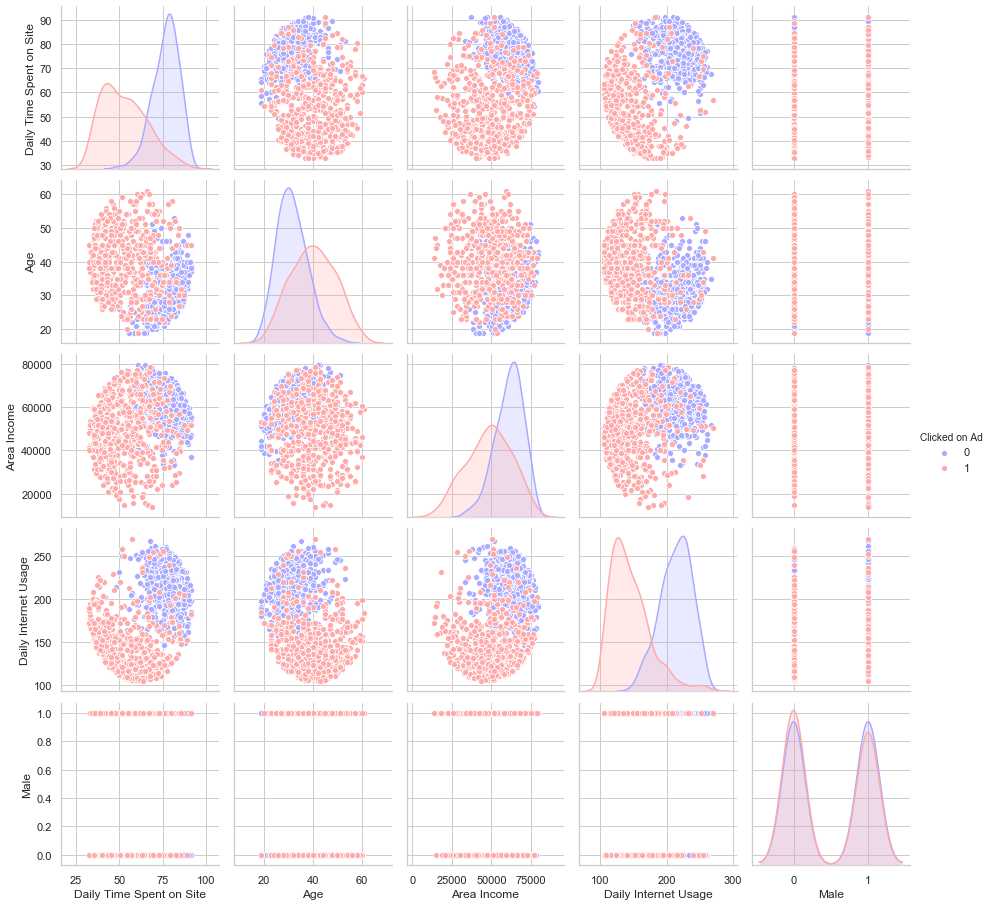

In [29]:
sns.pairplot(ad_data,hue='Clicked on Ad', palette='bwr', height=2.5)

# Logistic Regression

**Splitting the data into training and testing set**

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X = ad_data[['Daily Time Spent on Site', 'Age', 'Area Income','Daily Internet Usage', 'Male']]
y = ad_data['Clicked on Ad']

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=30)

**Creating Logistic Regression model object, and training and fitting the data on training set**

In [18]:
from sklearn.linear_model import LogisticRegression

In [19]:
logmodel = LogisticRegression()
logmodel.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

## Predictions and Evaluations

In [20]:
predictions = logmodel.predict(X_test)

**Determining accuracy of the predictions made**

In [21]:
accuracy = 0
for i in range(len(predictions)):
    if predictions[i] == y_test.iloc[i]:
        accuracy += 1
accuracy

262

**Accuracy of the model is** 

In [22]:
accuracy/len(predictions)*100

87.33333333333333

**Confusion Matrix and Classification Report can be given as:**

In [23]:
from sklearn.metrics import classification_report, confusion_matrix

In [24]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      0.86      0.88       157
           1       0.85      0.89      0.87       143

    accuracy                           0.87       300
   macro avg       0.87      0.87      0.87       300
weighted avg       0.87      0.87      0.87       300



In [25]:
print(confusion_matrix(y_test, predictions))

[[135  22]
 [ 16 127]]


**The Score for our Model**

In [26]:
logmodel.score(X,y)

0.907